In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
df = pd.read_csv('/Users/amitmishra/Downloads/Datasets/credit-risk/cr_loan2.csv')

In [25]:
#Removing outliers

indices = df[df['person_emp_length'] > 60].index
indices = df[df['person_age'] > 100].index



In [26]:
df.drop(indices, inplace = True)

In [28]:
# Impute the null values with the median value for all employment lengths

df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace = True)

In [29]:
print(df['loan_int_rate'].isnull().sum())

3115


In [30]:
indices = df[df['loan_int_rate'].isnull()].index
df_clean = df.drop(indices, inplace = False)

In [31]:
print(df_clean.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [32]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16442
MORTGAGE    13441
OWN          2584
OTHER         107
Name: count, dtype: int64

### Calculating probability of default using Logistic Regression

In [33]:
log = LogisticRegression(solver= 'lbfgs')

In [34]:
df_num = df_clean.select_dtypes(exclude=['object'])
df_str = df_clean.select_dtypes(include = ['object'])

In [35]:
#Perform one-hot encoding on the str datatypes

df_str_onehot = pd.get_dummies(df_str)

In [36]:
df_prep = pd.concat([df_num,df_str_onehot], axis = 1)

In [37]:
df_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,False,...,True,True,False,False,False,False,False,False,True,False


In [38]:
X = df_prep.drop(columns= ['loan_status'], axis = 1)
y = df_prep[['loan_status']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=42)

In [40]:
model_log = log.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print(model_log.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [42]:
print(model_log.intercept_)

[-0.02384063]


In [43]:
features_names = model_log.feature_names_in_
Coeff = model_log.coef_


In [44]:
for feature, coeff in zip(features_names, Coeff[0]):
    print(f"{feature}, Coefficient is: {coeff:.6f}")

person_age, Coefficient is: -0.129814
person_income, Coefficient is: -0.000034
person_emp_length, Coefficient is: -0.041796
loan_amnt, Coefficient is: 0.000103
loan_int_rate, Coefficient is: 0.213385
loan_percent_income, Coefficient is: 0.003433
cb_person_cred_hist_length, Coefficient is: 0.172039
person_home_ownership_MORTGAGE, Coefficient is: -0.038300
person_home_ownership_OTHER, Coefficient is: 0.000432
person_home_ownership_OWN, Coefficient is: -0.035750
person_home_ownership_RENT, Coefficient is: 0.049778
loan_intent_DEBTCONSOLIDATION, Coefficient is: 0.022284
loan_intent_EDUCATION, Coefficient is: -0.031297
loan_intent_HOMEIMPROVEMENT, Coefficient is: 0.012880
loan_intent_MEDICAL, Coefficient is: 0.010623
loan_intent_PERSONAL, Coefficient is: -0.006832
loan_intent_VENTURE, Coefficient is: -0.031499
loan_grade_A, Coefficient is: -0.036111
loan_grade_B, Coefficient is: -0.045213
loan_grade_C, Coefficient is: -0.028631
loan_grade_D, Coefficient is: 0.061546
loan_grade_E, Coefficien

#### Based on the coefficients, we can hypothesize that loan_int_rate and cb_person_cred_hist_length are important predictors of loan defaults

In [45]:
preds = model_log.predict_proba(X_test)

In [46]:
y_pred = model_log.predict(X_test)

In [47]:
print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.8227257298031229


In [48]:
# Create a dataframe for the probabilities of default

df_preds = pd.DataFrame(preds[:,1], columns= ['prob_default'])

In [49]:
# Reassign loan status based on the threshold of 0.5

df_preds['loan_status'] = df_preds['prob_default'].apply(lambda x:1 if x > 0.5 else 0)

In [50]:
print(df_preds['loan_status'].value_counts())

loan_status
0    10501
1     1283
Name: count, dtype: int64


In [52]:
y_prob = model_log.predict_proba(X_test)[:,1]

### Plotting ROC curve

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_prob)

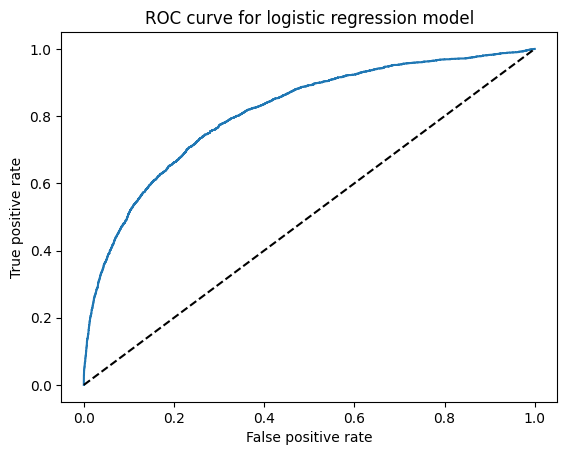

In [55]:
plt.plot(fpr, tpr)
plt.title("ROC curve for logistic regression model")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1],[0,1], "k--")
plt.show()

In [56]:
#Printing AUC score of the mode

print(f"AUC score of logistic regression odel is: {roc_auc_score(y_test, y_prob)}")

AUC score of logistic regression odel is: 0.8109055568209947


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      9186
           1       0.70      0.34      0.46      2598

    accuracy                           0.82     11784
   macro avg       0.77      0.65      0.68     11784
weighted avg       0.81      0.82      0.80     11784



### Only 34% of our defaults were predicted correctly with a threshold of 0.5

In [57]:
df_preds

,prob_default,loan_status
0,0.199919,0
1,0.119664,0
2,0.017587,0
3,0.074459,0
4,0.227230,0
...,...,...
11779,0.190603,0
11780,0.012550,0
11781,0.303390,0
11782,0.381279,0


In [60]:
#Reassign loan status based on a threshold of 0.4

df_preds['loan_status_0.4'] = df_preds['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)


In [62]:
print(classification_report(y_test, df_preds['loan_status_0.4']))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      9186
           1       0.59      0.50      0.54      2598

    accuracy                           0.81     11784
   macro avg       0.73      0.70      0.71     11784
weighted avg       0.81      0.81      0.81     11784



### Result: Higher recall value when threshold is changed to 0.4

In [64]:
#Calculating estimated impact of new default recall rate

In [65]:
df_preds.head()

,prob_default,loan_status,loan_status_0.4
0,0.199919,0,0
1,0.119664,0,0
2,0.017587,0,0
3,0.074459,0,0
4,0.227230,0,0


In [77]:
#Store the number of loan defaults and get the default recalls

num_defaults = df_preds['loan_status_0.4'].value_counts()[1]

In [68]:
from sklearn.metrics import precision_recall_fscore_support

In [74]:
scores = precision_recall_fscore_support(y_test, df_preds['loan_status_0.4'])

In [75]:
print(scores)

(array([0.86499739, 0.59299682]), array([0.90256913, 0.50192456]), array([0.88338394, 0.54367313]), array([9186, 2598]))


In [76]:
default_recall = scores[1][1]

In [82]:
#Estimated impact

avg_loan_amt = df_num['loan_amnt'].mean()

impact = num_defaults * avg_loan_amt * (1-default_recall)

In [90]:
print(f"Estimated loss through not predicting defaults through the mode is: $ {impact:.2f}")

Estimated loss through not predicting defaults through the mode is: $ 10496610.46
